In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import wandb


df = pd.read_csv("../../data/csv/cleaned_fix.csv")

2025-06-13 14:01:08.302128: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 14:01:08.311155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749816068.322036 1008161 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749816068.325339 1008161 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749816068.333413 1008161 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
df

,Unnamed: 0,Image,Scene,ROI,Participant,FixDur,FixNr,Start,End,X,Y,Name,NextROI,experience
0,0,1,1,0,2.0,103.0,1.0,7.0,109.0,510.9,381.0,Back_wall,Bottle_on_table,Control
1,1,1,1,22,2.0,77.0,2.0,236.0,312.0,450.8,307.0,Curtains,Floor,Control
2,2,1,1,9,2.0,300.0,3.0,347.0,646.0,414.5,447.9,Back_chair,Body,Control
3,3,1,1,8,2.0,165.0,4.0,687.0,851.0,468.6,619.1,Floor,Elsewhere,Control
4,4,1,1,0,2.0,461.0,5.0,876.0,1336.0,465.4,687.9,Body,Elsewhere,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30130,30840,2,3,7,9008.0,243.0,71.0,25535.0,25777.0,307.6,524.2,Table,NaN,Control
30131,30841,2,3,13,9008.0,274.0,72.0,25829.0,26102.0,530.8,385.8,Right_plate,NaN,Control
30132,30842,2,3,14,9008.0,374.0,73.0,26136.0,26509.0,623.9,466.2,Right_fork,NaN,Control
30133,30843,2,3,7,9008.0,170.0,74.0,26578.0,26747.0,305.1,542.6,Table,NaN,Control


In [3]:
selected_columns = ["Image", "Scene", "ROI", "FixDur", "FixNr", "Start", "End", "X", "Y", "Name", "NextROI"]
X = df[selected_columns]

#X = df.iloc[:, :-1]  # first 11 columns as features
y = df['Participant']   # last column as target

In [4]:
X

,Image,Scene,ROI,FixDur,FixNr,Start,End,X,Y,Name,NextROI
0,1,1,0,103.0,1.0,7.0,109.0,510.9,381.0,Back_wall,Bottle_on_table
1,1,1,22,77.0,2.0,236.0,312.0,450.8,307.0,Curtains,Floor
2,1,1,9,300.0,3.0,347.0,646.0,414.5,447.9,Back_chair,Body
3,1,1,8,165.0,4.0,687.0,851.0,468.6,619.1,Floor,Elsewhere
4,1,1,0,461.0,5.0,876.0,1336.0,465.4,687.9,Body,Elsewhere
...,...,...,...,...,...,...,...,...,...,...,...
30130,2,3,7,243.0,71.0,25535.0,25777.0,307.6,524.2,Table,NaN
30131,2,3,13,274.0,72.0,25829.0,26102.0,530.8,385.8,Right_plate,NaN
30132,2,3,14,374.0,73.0,26136.0,26509.0,623.9,466.2,Right_fork,NaN
30133,2,3,7,170.0,74.0,26578.0,26747.0,305.1,542.6,Table,NaN


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])  # Keep only numeric columns
X_scaled = StandardScaler().fit_transform(X_numeric)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [8]:
X_train

array([[-0.91276541,  1.38855586, -1.24704879, ..., -0.46386908,
        -0.91782835, -1.21502936],
       [ 1.09557175, -1.07192283, -0.9525569 , ..., -0.71571589,
        -0.98485482,  0.54954964],
       [ 1.09557175, -1.07192283, -0.65806501, ...,  2.032987  ,
        -0.0380474 , -0.40551831],
       ...,
       [-0.91276541, -1.07192283,  0.0781647 , ..., -0.29033094,
         0.01257398,  0.1707438 ],
       [-0.91276541,  1.38855586,  1.55062414, ...,  0.28044432,
         2.22257248,  1.2749479 ],
       [-0.91276541,  1.38855586,  0.66714848, ..., -0.55168066,
         0.41285791, -1.27707   ]])

In [9]:
# print(X_train.dtype)
# print(y_train.dtype)

In [10]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(9,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    
    layers.Dense(36, activation='softmax')
])

/home/sam/anaconda3/envs/thesis/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1749816071.171482 1008161 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Use 'binary_crossentropy' for classification

In [12]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.1)

Epoch 1/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0491 - loss: 3.6370 - val_accuracy: 0.0763 - val_loss: 3.3330
Epoch 2/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0807 - loss: 3.3372 - val_accuracy: 0.1020 - val_loss: 3.1699
Epoch 3/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1150 - loss: 3.1461 - val_accuracy: 0.1522 - val_loss: 2.9461
Epoch 4/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1454 - loss: 2.9840 - val_accuracy: 0.1767 - val_loss: 2.8248
Epoch 5/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1523 - loss: 2.9142 - val_accuracy: 0.1817 - val_loss: 2.7549
Epoch 6/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1621 - loss: 2.8465 - val_accuracy: 0.1958 - val_loss: 2.7226
Epoch 7/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1681 - loss: 2.8210 - val_accuracy: 0.2012 - val_loss: 2.6813
Epoch 8/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1788 - loss: 2.7811 - val_accu

In [13]:
model.evaluate(X_test, y_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.3683 - loss: 1.9887


[1.9854305982589722, 0.36054420471191406]

In [14]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()


In [15]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.3683 - loss: 1.9887

Test Loss: 1.9854, Test MAE: 0.3605


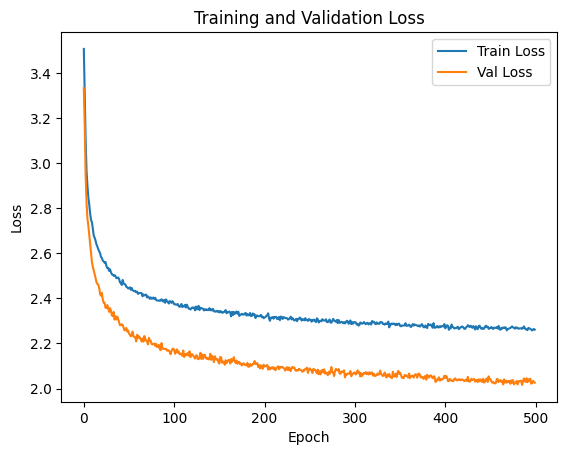

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


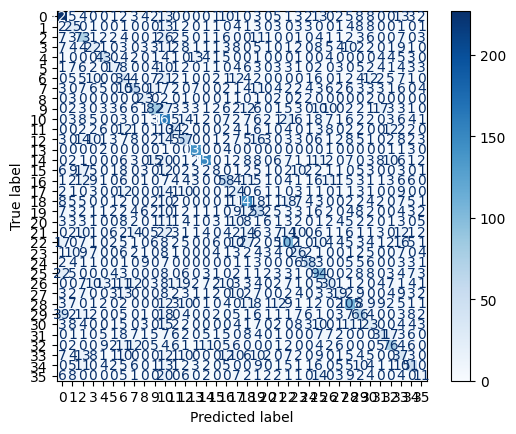

In [17]:
# No need to use np.argmax since y_test is already class indices
y_true = y_test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

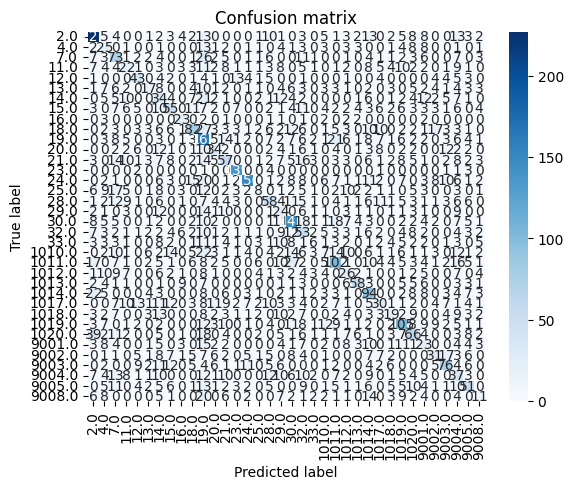

In [18]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [20]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       341
           1       0.18      0.29      0.22        87
           2       0.30      0.42      0.35       174
           3       0.20      0.17      0.18       133
           4       0.43      0.43      0.43       101
           5       0.32      0.16      0.21       107
           6       0.15      0.23      0.18       151
           7       0.38      0.31      0.34       180
           8       0.40      0.57      0.47        40
           9       0.51      0.36      0.42       229
          10       0.28      0.54      0.37       300
          11       0.32      0.28      0.30       120
          12       0.32      0.28      0.30       202
          13       0.76      0.91      0.83       152
          14       0.75      0.53      0.62       284
          15       0.20      0.07      0.10       115
          16       0.37      0.33      0.35       178
    